# Technical Assessment
### Nuno Pedrosa

In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import shap
import joblib

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
# Get Data

Train = pd.read_csv('Data/X_train.csv')
Test = pd.read_csv('Data/X_test.csv')

In [22]:
Train.head()

,longevity,avg_sales_per_day,avg_days_btwn_sales,median_days_btwn_sales,max_days_btwn_sales,month_revenue_eur,year_revenue_eur,month_average_order_value,year_plat_cntry_aov,csat,...,cs_tickets_bad,total_tickets,platform_c44577a5b4c0036fe1ec82c04bfa87c6,market_country_3302c92812d6248fed26ac6bbd255217,market_country_49ea251b719ccdc5894c5a18ace974be,market_country_64f6711e77d2ec8af8ac3292c66d2875,market_country_6b681da4aa6e2f33a5f06ff660ba0e9e,market_country_9a6e56e83f8d0f692203f7b4850f86ff,market_country_c097bb1538327aaf74797d23f6fcef83,status
0,-1.504444,-0.060750,-0.518565,-0.284632,-0.731312,-0.367085,-0.243932,-0.599229,-0.744912,-0.204484,...,-0.121836,-0.192520,-0.287038,-0.086711,-0.175412,-0.338834,-0.560112,-0.516276,1.198484,0
1,-0.835885,-0.038981,-0.577650,-0.476329,-0.659727,1.665316,0.111675,-0.246622,-0.041130,-0.204484,...,-0.121836,0.213104,3.483856,-0.086711,-0.175412,-0.338834,1.785357,-0.516276,-0.834388,0
2,-0.013255,-0.198462,-0.060651,-0.336913,-0.117732,-0.484745,-0.210024,-0.758190,1.005016,-0.204484,...,-0.121836,-0.192520,-0.287038,-0.086711,-0.175412,-0.338834,1.785357,-0.516276,-0.834388,1
3,1.673274,0.143003,-0.666279,-0.441475,-0.496106,0.013753,0.021975,-0.380008,-0.041130,-0.204484,...,-0.121836,-0.192520,3.483856,-0.086711,-0.175412,-0.338834,1.785357,-0.516276,-0.834388,0
4,-1.490688,-0.030175,-0.710593,-0.458902,-0.935838,0.256376,-0.180726,0.101377,-0.312458,-0.204484,...,-0.121836,-0.057312,-0.287038,-0.086711,-0.175412,-0.338834,1.785357,-0.516276,-0.834388,1


In [3]:
# Separate X and y data

y_train = pd.DataFrame({'status':Train['status']})
y_test = pd.DataFrame({'status':Test['status']})

X_train = Train.drop(['status'], axis=1)
X_test = Test.drop(['status'], axis=1)

## Task 3 - Model Development - Part 2

### Model Selection and Development

In [4]:
y_train = y_train['status'].copy()
y_test = y_test['status'].copy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In a first step, I will try a list of different models, to see what is the one that gives a better fit to our data

In [5]:
# Defining models to test

# Neural Networks
NN_classifier = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=2000, random_state=0)
NN_classifier.fit(X_train, y_train)

# XGBoost
XGB_classifier = xgb.XGBClassifier(random_state=0)
XGB_classifier.fit(X_train, y_train)

# Random Forest
RF_classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
RF_classifier.fit(X_train, y_train) 

# Logistic Regression
LR_classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
LR_classifier.fit(X_train, y_train) 

# Gaussian Naive Bayes
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train) 

# K Nearest Neighbors 
KNN_classifier = KNeighborsClassifier(n_neighbors=20)
KNN_classifier.fit(X_train, y_train) 

# Support Vector Machine
SVC_classifier = SVC(random_state=0)
SVC_classifier.fit(X_train, y_train) 

SVC(random_state=0)

In [6]:
classifier_list = [(NN_classifier, 'NN'), (XGB_classifier, 'XGB'), (RF_classifier, 'RF'), (LR_classifier,'LR'), (NB_classifier,'NB'), (KNN_classifier,'KNN'), (SVC_classifier,'SVC')]

def cross_v(name, estimator, X, y):
    all_accuracies = cross_val_score(estimator=estimator, X=X, y=y, cv=5)
    print(name)
    print(round(all_accuracies.mean(),2), u"\u00B1", round(all_accuracies.std(),2))
    print('')
    return(all_accuracies)

Cross_val_list = []
print('Cross Validation values for different models')
print('')

for estimator, name in classifier_list:
    cv = cross_v(name, estimator, X_train, y_train)
    Cross_val_list.append(cv)

Cross Validation values for different models

NN
0.82 ± 0.02

XGB
0.89 ± 0.02

RF
0.87 ± 0.02

LR
0.8 ± 0.04

NB
0.68 ± 0.03

KNN
0.76 ± 0.05

SVC
0.8 ± 0.03



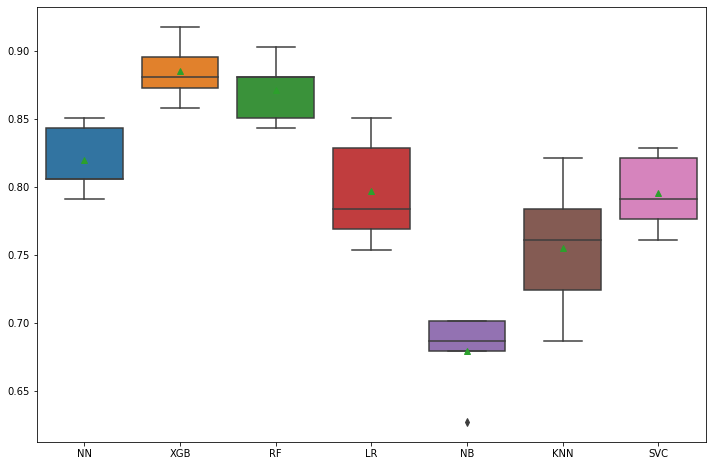

In [7]:
# Visualising Cross Validation results

# Flatten accuracy values and create corresponding model labels
Accuracies_Flat_List = list(itertools.chain(*Cross_val_list))
Accuracies_Names = [code for c, code in classifier_list for n in range(0,5)]

# Create the boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x=Accuracies_Names, y=Accuracies_Flat_List, showmeans=True)

The best model is XGBoost, so I will now study wich combination of hyperparameters give the best accuracy

In [52]:
pipeline = Pipeline([
    ('XGB', xgb.XGBClassifier(random_state=0)),
])
param_grid = {
    'XGB__max_depth': [3, 5, 7],               # Control tree depth (higher = more complexity)
    'XGB__learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'XGB__n_estimators': [100, 200, 500],       # Number of boosting rounds
    'XGB__min_child_weight': [1, 3, 5],         # Minimum child weight to control overfitting
    'XGB__subsample': [0.7, 1.0],               # Fraction of training samples
    'XGB__reg_lambda': [0.1, 1, 10],            # L2 regularization (Ridge regression)
    'XGB__reg_alpha': [0, 0.1, 1]               # L1 regularization (Lasso regression)
}

grid_search_tune_review = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=1, verbose=3)
grid_search_tune_review.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune_review.best_estimator_.steps)

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[CV 1/3] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__min_child_weight=1, XGB__n_estimators=100, XGB__reg_alpha=0, XGB__reg_lambda=0.1, XGB__subsample=0.7;, score=0.826 total time=   0.0s
[CV 2/3] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__min_child_weight=1, XGB__n_estimators=100, XGB__reg_alpha=0, XGB__reg_lambda=0.1, XGB__subsample=0.7;, score=0.874 total time=   0.0s
[CV 3/3] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__min_child_weight=1, XGB__n_estimators=100, XGB__reg_alpha=0, XGB__reg_lambda=0.1, XGB__subsample=0.7;, score=0.834 total time=   0.0s
[CV 1/3] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__min_child_weight=1, XGB__n_estimators=100, XGB__reg_alpha=0, XGB__reg_lambda=0.1, XGB__subsample=1.0;, score=0.821 total time=   0.0s
[CV 2/3] END XGB__learning_rate=0.01, XGB__max_depth=3, XGB__min_child_weight=1, XGB__n_estimators=100, XGB__reg_alpha=0, XGB__reg_lambda=0.1, XGB__subsamp

Best parameters set outside of the norm:

- learning_rate=0.1 

- max_depth=5 

- min_child_weight=1 

- n_estimators=200


In [10]:
classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, 
                                    min_child_weight=1, n_estimators=200, random_state=0)
classifier.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [11]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring='accuracy')
precisions = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring='precision')
recalls = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring='recall')
f1 = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring='f1')

print('     Accuracy')
print('%6.2f' % accuracies.mean(), 'std','%3.2f' % accuracies.std())
print()
print('    Precision')
print('%6.2f' % precisions.mean(), 'std','%3.2f' % precisions.std())
print()
print('     Recall')
print('%6.2f' % recalls.mean(), 'std','%3.2f' % recalls.std())
print()
print('    F1-score')
print('%6.2f' % f1.mean(), 'std','%3.2f' % f1.std())
print()

     Accuracy
  0.89 std 0.02

    Precision
  0.91 std 0.02

     Recall
  0.86 std 0.04

    F1-score
  0.88 std 0.02



### Performance on Test Dataset

In [12]:
# tem de ser LR_classifier.predict_proba(X_test)[:,1] e não o y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, classifier.predict_proba(X_test)[:,1], pos_label=1)
auc_roc = metrics.auc(fpr, tpr)
round(auc_roc,3)

0.976

In [13]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('optimal idx :', optimal_idx)
print('optimal threshold :', round(optimal_threshold, 3))
print('tpr optimal idx:', round(tpr[optimal_idx],3))
print('fpr optimal idx:', round(fpr[optimal_idx],3))

optimal idx : 24
optimal threshold : 0.391
tpr optimal idx: 0.932
fpr optimal idx: 0.077


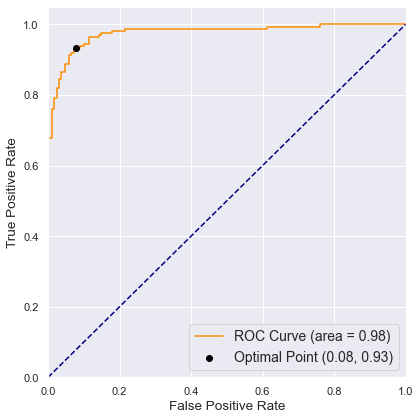

In [14]:
sns.set(rc={"figure.figsize":(6, 6)})

plt.plot(fpr, tpr, color='darkorange',
         label='ROC Curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter([fpr[optimal_idx]], [tpr[optimal_idx]], color="black", zorder=5,
         label='Optimal Point (%0.2f, %0.2f)' % (fpr[optimal_idx], tpr[optimal_idx]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=13.5)
plt.ylabel('True Positive Rate', fontsize=13.5)
plt.legend(loc="lower right", fontsize=14)

plt.tight_layout()
plt.show()

Now we can predict with the chosen best treshold

In [15]:
y_pred = (classifier.predict_proba(X_test)[:,1] >= optimal_threshold).astype(bool)

In [16]:
print(metrics.classification_report(y_test,y_pred))

[[155  13]
 [ 11 151]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       168
           1       0.92      0.93      0.93       162

    accuracy                           0.93       330
   macro avg       0.93      0.93      0.93       330
weighted avg       0.93      0.93      0.93       330



We got 0.93 accuracy on test data

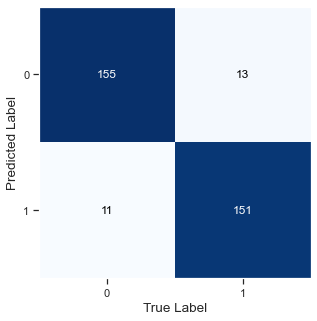

In [17]:
sns.set(rc={"figure.figsize":(5, 5)})

c_matrix = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(c_matrix)

plt.xlabel('True Label', fontsize=13.5)
plt.ylabel('Predicted Label', fontsize=13.5)
plt.show()

### Model Explanation

There are 5 metrics to see the contribution of features in XGBoost:

- weight - the number of times a feature is used to split the data across all trees.

- gain - the average gain across all splits the feature is used in.

- cover - the average coverage across all splits the feature is used in.

- total_gain - the total gain across all splits the feature is used in.

- total_cover - the total coverage across all splits the feature is used in.

I will evaluate using the gain method, which is typically the most commonly used approach to assess feature importance, as it shows the contribution of a feature to the model's accuracy.


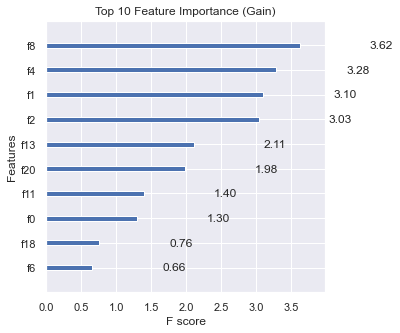

In [18]:
# Plot feature importance (Gain)
ax = xgb.plot_importance(classifier, importance_type='gain', max_num_features=10, values_format='{v:.2f}')
plt.title('Top 10 Feature Importance (Gain)')
plt.show()

In [19]:
# Create a dictionary with Gain info
new_dict = dict(zip(Train.columns, classifier.get_booster().get_score(importance_type='gain').values()))

d_view = [ (v,k) for k,v in new_dict.items() ]
d_view.sort(reverse=True)
for v,k in d_view:
    print( "%s: %0.2f" % (k,v))

year_plat_cntry_aov: 3.62
max_days_btwn_sales: 3.28
avg_sales_per_day: 3.10
avg_days_btwn_sales: 3.03
cs_tickets_offered: 2.11
market_country_3302c92812d6248fed26ac6bbd255217: 1.98
cs_tickets_good: 1.40
longevity: 1.30
total_tickets: 0.76
year_revenue_eur: 0.66
month_average_order_value: 0.58
month_revenue_eur: 0.54
median_days_btwn_sales: 0.54
platform_c44577a5b4c0036fe1ec82c04bfa87c6: 0.22
csat: 0.18
cs_tickets_bad: 0.17


We can conclude that the variables that impact more the results of our model are, in order of importance: 
- year_plat_cntry_aov
- max_days_btwn_sales
- avg_sales_per_day
- avg_days_btwn_sales

In [25]:
# Shap analysis

explainer = shap.Explainer(classifier)
shap_values = explainer.shap_values(X_test)

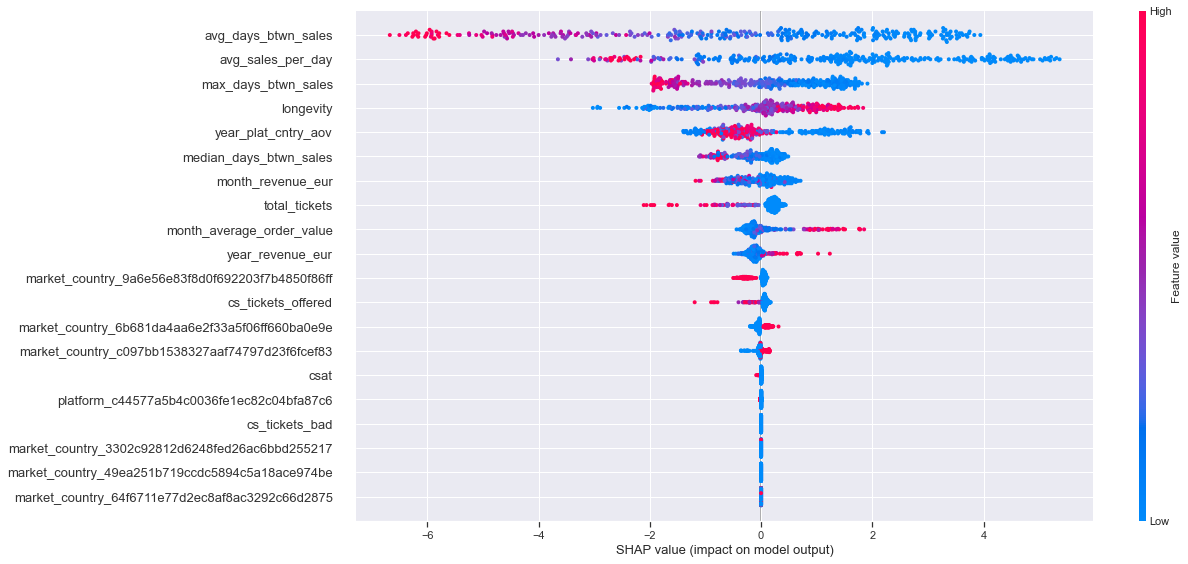

In [41]:
shap.summary_plot(shap_values, X_test, feature_names=Train.columns[:21], plot_size=[18,8])

Upon analyzing the SHAP plot, we observed that the features most influencing the results are:
- year_plat_cntry_aov
- max_days_btwn_sales
- avg_sales_per_day
- avg_days_btwn_sales
- longevity

Among these, the higher the values for year_plat_cntry_aov, max_days_btwn_sales, avg_sales_per_day, and avg_days_btwn_sales, the greater the likelihood that a consumer will churn. This makes sense, as consumers who take longer to make subsequent purchases are likely to show less interest in the company. Conversely, when these values are lower, the probability of churn decreases.

The longevity variable behaves oppositely, indicating that the longer a customer has been interested in the company's products, the less likely they are to churn.

### Model Packaging

In [ ]:
joblib.dump(classifier, 'model/my_model/model.pkl')

The rest of this section is in the model folder